### Analyzing the Stroop Effect - Introduction

In a Stroop task (Reference 1), individuals are shown words (a color) in differing colors of ink under two conditions, the congruent condition for which the colored words have ink which match the color of the word (blue written in blue ink, black written in black ink, etc...) and the incongruent condition for which the colored words have ink which do not match the color of the word (blue written in red ink, black written in purple ink, etc...).  The time it takes individuals to accurately state the color of each word is recorded.  The purpose of this project is to take some available data on the time to state the correct color of ink for each condition and determine if there is a significant difference in the mean times.  My expectation is that the mean time for the incongruent condition will be significantly greater than the congruent condition.  Under the incongruent condition, two different perceptual phenomena will be at play for each individual; the color of ink used and the color of the word itself.  These two phenomena will be different and should cause confusion for each individual, requiring a larger amount of time to accurately state the color of the ink.

### Definition of Independent and Dependent Variables and Hypotheses 

First I will define the independent and dependent variables and the hypotheses so that I know which hypothesis to test in order to determine statistical significance.

Recorded in the stroopdata.csv file are times for each participant to state the correct color of the ink under the congruent and incongruent conditions (Reference 2). Since the time to state the correct color of the ink will depend on the condition, the condition will be the independent variable and the time to correctly state the word will be the dependent variable.

My expectation is that the mean time of all participants to accurately state the color of the ink in the incongruent condition will be greater than the mean time in the congruent condition.  The null and alternative hypotheses for this are as follows:

$$
H_0:\mu_{incongruent}-\mu_{congruent} \leq 0
$$
$$
H_1: \mu_{incongruent}-\mu_{congruent} > 0
$$

Where $H_0$ and $H_1$ are the null and alternative hypotheses, respectively, and $\mu_{incongruent}$ and $\mu_{congruent}$ are the mean times across all subjects to state the correct color of ink under the incongruent and congruent conditions, respectively.

I chose the null and alternative hypotheses to be the above because I expect the incongruent condition has a mean time greater than the congruent condition.  This is what I think is true and I want to show this.  We allow the alternative hypothesis to be the condition we would like to show to be true (Reference 3).  The null hypothesis is the opposite of the alternative hypothesis and contains an equals sign (Reference 3).

### Measures of Central Tendency and Variability for sample times under each condition

Before viewing the data visually and performing a statistical test for significance, I will first determine some descriptive statistics for the sample data including two measures of central tendency (mean and median of times for each condition) and one measure of variability.  This will give us an idea of how the sample data differs before using a significance test to say something about the overall population.

In [1]:
# Importing both pandas and matplotlib in order to plot the data and find descriptive statistics (References 4 and 5)
import pandas as pd
import matplotlib.pyplot as plt

# Use this command to show the plots inline with the text (Reference 6)
%matplotlib inline

# Read in the data (Reference 7)
df = pd.read_csv('stroopdata.csv')

# See what the dataframe looks like from the first few rows (Reference 8)
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
# Using shape to see the number of rows and columns in the df dataframe (Reference 9)

df.shape

(24, 2)

In [3]:
# Using .info to see if there are any missing values in the dataframe (Reference 10)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [4]:
# There are no missing data from the above information.  So I can just use the .mean() function to find the mean of each column 
# (times to state correct ink under each condition) (Reference 11).

df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [5]:
# I will also find the median, another measure of central tendency to further determine which condition requires longer times
# to correctly state the color of the ink based on this sample data (Reference 12).
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [6]:
# I will determine the standard deviation to find a measure of variability (Reference 13).
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

From the above commands, the mean time to state the correct color of ink for the congruent and incongruent conditions are 14.05 and 22.02 seconds, respectively. The median times for the congruent and incongruent conditions are 14.36 and 21.02 seconds, respectively. The standard deviation, a measure of variability, is 3.56 and 4.80 seconds for the congruent and incongruent conditions, respectively. For this sample data, the incongruent condition has both a higher mean and median time to state the correct color of ink. It's important to realize that the mean times reported are for the sample size only and do not represent all of the human population. The importance of running a test for statistical significance is that I want to determine the likelihood that there would actually be a difference in the mean times (and that the incongruent condition would have a higher mean time) if we had data for all the human population (Reference 14).

### Visualization of distribution of data for each condition

Now I will visualize the distribution of the data for each condition on the same plot so that I can compare them.  I expect for this sample data that most of the times for the incongruent condition will be greater than (to the right of) the times for the congruent condition.

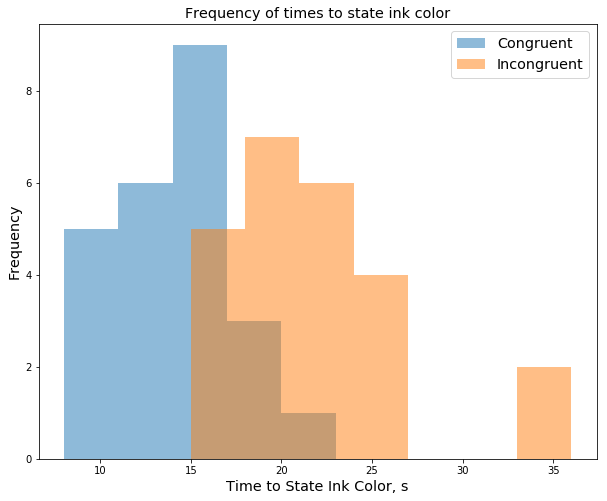

In [7]:
# Adjust figure size (Reference 15)
plt.figure(figsize = (10,8)) 

# Determine binwidth based on minimum and maximum values under both conditions (Reference 16).  I chose a binwidth of 3 after 
# playing around with different values.
bins_congruent=range(int(min(df['Congruent'])), int(max(df['Congruent']) + 3), 3)    
bins_incongruent=range(int(min(df['Incongruent'])), int(max(df['Incongruent']) + 3), 3)

# Plot distribution of data for each condition with transparency (alpha) of 0.5 so that I can see both distributions and compare
# them (References 17 and 18)
plt.hist(df['Congruent'], bins_congruent, alpha = 0.5, label = 'Congruent');
plt.hist(df['Incongruent'], bins_incongruent, alpha = 0.5, label = 'Incongruent');
plt.legend(loc = 'upper right', fontsize = 'x-large')

# Label the x axis, y axis, title and adjust the sizes (References 19 and 20)
plt.xlabel('Time to State Ink Color, s', size = 'x-large')
plt.ylabel('Frequency', size = 'x-large')
plt.title('Frequency of times to state ink color', size = 'x-large')
plt.show()

Based on the histograms of the data in the plot directly above, most of the times for the incongruent condition from the sample are greater than the times for the congruent condition and the median for the incongruent condition is clearly greater than that of the congruent condition.  I suspect this would be true for all humans but a statistical test for significance is needed to infer something about the general population.  This data is only a sample of 24 participants.

### Resources

Reference 1: https://www.psytoolkit.org/lessons/stroop.html

Reference 2: https://classroom.udacity.com/nanodegrees/nd002/parts/1ba6332a-d816-4b97-a32d-f4e684bf11ce/modules/66f6e2ae-c356-4f6f-bed5-73ca5613be95/lessons/33253220-6815-4099-be84-6baf201c56b5/concepts/46699624-0d08-4c1f-b403-19775476fdbe

Reference 3: https://classroom.udacity.com/nanodegrees/nd002/parts/682048c9-4e1a-4020-8a47-7eaf3e34f0fe/modules/e4508dac-d083-427b-be3d-63663aeada68/lessons/ad8aca80-f444-4479-8848-5b07bafaf66c/concepts/2ff6c25f-c80a-4be2-912e-83639e98774e

Reference 4: http://pandas.pydata.org/pandas-docs/stable/10min.html

Reference 5: https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

Reference 6: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline/43028034

Reference 7: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

Reference 8: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

Reference 9: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html

Reference 10: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

Reference 11: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html

Reference 12: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html

Reference 13: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html

Reference 14: https://classroom.udacity.com/nanodegrees/nd002/parts/682048c9-4e1a-4020-8a47-7eaf3e34f0fe/modules/e4508dac-d083-427b-be3d-63663aeada68/lessons/ad8aca80-f444-4479-8848-5b07bafaf66c/concepts/2526e240-f043-4e8e-b7e5-befe0d69769a

Reference 15: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

Reference 16: https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram

Reference 17: https://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib

Reference 18: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend

Reference 19: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html

Reference 20: https://matplotlib.org/api/text_api.html#matplotlib.text.Text